In [36]:
import pandas as pd

df = pd.read_csv('btcusd_1-min_data.csv')
df = df[0:10000]
# print(df.describe())

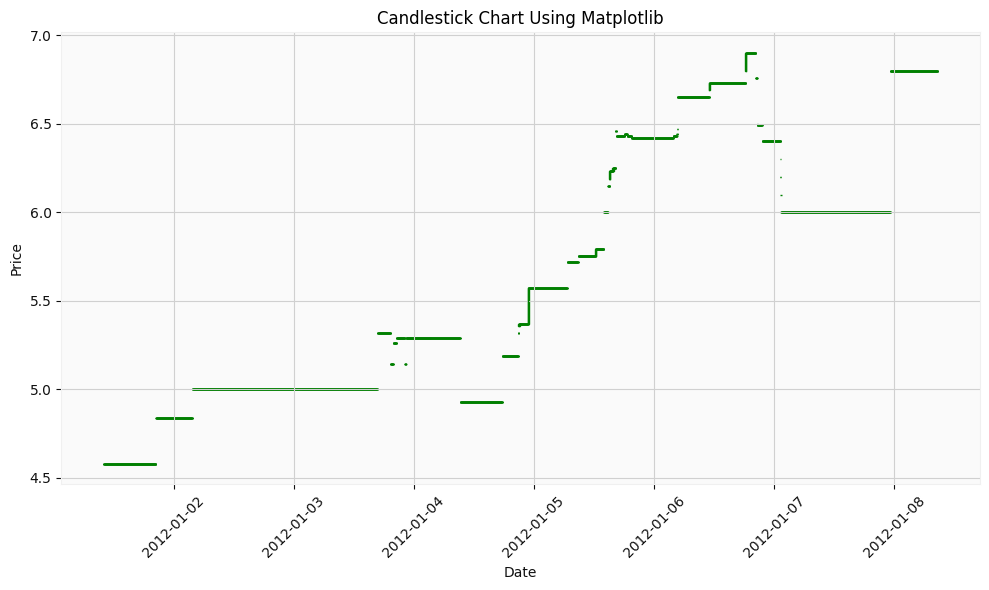

In [37]:
# df['Date'] = pd.to_datetime(df['Timestamp'], unit='s')
if 'Date' not in df.index.names:
    df['Date'] = pd.to_datetime(df['Timestamp'], unit='s')

# Only set the index if it's not already set
if 'Date' not in df.index.names:
    df.set_index('Date', drop=True, inplace=True)
    
df.sort_values('Date', inplace=True)  # Ensure data is sorted by date
# df.set_index('Date', inplace=True)

# Prepare the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Set candlestick width (in days)
width = 0.01

# Loop through each row and plot candlestick
for date, row in df.iterrows():
    # Convert date to a number (required for plotting)
    date_num = mdates.date2num(date)
    open_price = row['Open']
    high_price = row['High']
    low_price = row['Low']
    close_price = row['Close']

    # Determine the color: green for bullish, red for bearish
    if close_price >= open_price:
        color = 'green'
        lower = open_price
        height = close_price - open_price
    else:
        color = 'red'
        lower = close_price
        height = open_price - close_price

    # Draw the body as a rectangle
    rect = Rectangle((date_num - width/2, lower), width, height, color=color)
    ax.add_patch(rect)

    # Draw the wicks (high and low)
    ax.plot([date_num, date_num], [low_price, high_price], color=color, linewidth=1)

# Format the x-axis for dates
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.title('Candlestick Chart Using Matplotlib')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [23]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.patches import Rectangle


D:\MYPROJECTS\dashboard\venv\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


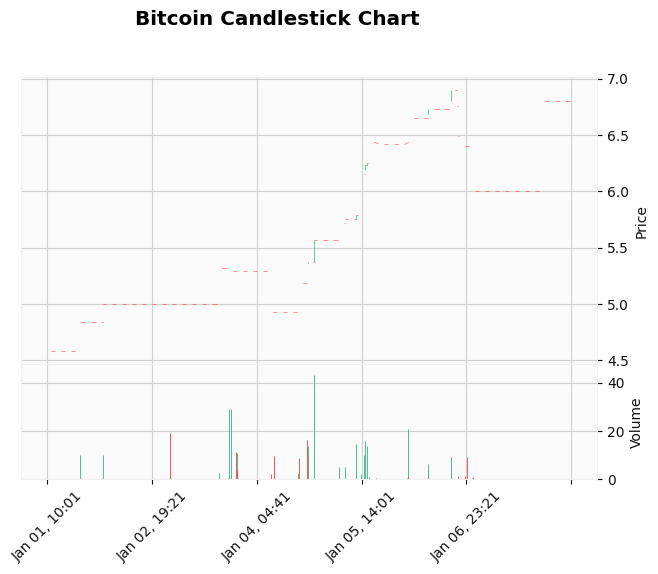

In [38]:
import pandas as pd
import mplfinance as mpf

# Assuming your DataFrame is named df
# Convert 'Timestamp' from UNIX time to datetime
df['Date'] = pd.to_datetime(df['Timestamp'], unit='s')

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Select only the necessary columns for candlestick charts
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Plot the candlestick chart with volume
mpf.plot(df, type='candle', volume=True, title='Bitcoin Candlestick Chart', style='yahoo')


In [30]:
!pip install mplfinance

You should consider upgrading via the 'D:\MYPROJECTS\dashboard\venv\Scripts\python.exe -m pip install --upgrade pip' command.
